In [ ]:
import matplotlib.pyplot as plt
import numpy as np 
import torch            
import torch.nn as nn   

class happynet(nn.Module):
    """
    A flexible neural network with a customizable depth.
    
    Parameters:
    n_feature: Dimension of input.
    n_hidden: Number of units in each hidden layer.
    n_output: Number of output units.
    n_layer: the number of layers (supports 3 to 10 layers). 
             (n_layer-1) hidden layers
    
    Methods:
    forward(x): Forward pass through the network.
    """
    def __init__(self, n_feature, n_hidden, n_output, n_layer): 
        super().__init__()
        if n_layer == 3: 
            self.net = nn.Sequential(
                nn.Linear(n_feature, n_hidden), 
                nn.ReLU(),
                nn.Linear(n_hidden, n_hidden), 
                nn.ReLU(),
                nn.Linear(n_hidden, n_output), 
            )
        elif n_layer == 2: 
            self.net = nn.Sequential(
                nn.Linear(n_feature, n_hidden), 
                nn.ReLU(),
                nn.Linear(n_hidden, n_output), 
            )    
        elif n_layer == 4: 
            self.net = nn.Sequential(
                nn.Linear(n_feature, n_hidden), 
                nn.ReLU(),
                nn.Linear(n_hidden, n_hidden), 
                nn.ReLU(),
                nn.Linear(n_hidden, n_hidden), 
                nn.ReLU(),
                nn.Linear(n_hidden, n_output), 
            )
        elif n_layer == 5: 
            self.net = nn.Sequential(
                nn.Linear(n_feature, n_hidden), 
                nn.ReLU(),
                nn.Linear(n_hidden, n_hidden), 
                nn.ReLU(),
                nn.Linear(n_hidden, n_hidden), 
                nn.ReLU(),
                nn.Linear(n_hidden, n_hidden),  
                nn.ReLU(),
                nn.Linear(n_hidden, n_output),
            )
        elif n_layer == 6: 
            self.net = nn.Sequential(
                nn.Linear(n_feature, n_hidden), 
                nn.ReLU(),
                nn.Linear(n_hidden, n_hidden), 
                nn.ReLU(),
                nn.Linear(n_hidden, n_hidden), 
                nn.ReLU(),
                nn.Linear(n_hidden, n_hidden),  
                nn.ReLU(),
                nn.Linear(n_hidden, n_hidden), 
                nn.ReLU(),
                nn.Linear(n_hidden, n_output),
            )
        elif n_layer == 7: 
            self.net = nn.Sequential(
                nn.Linear(n_feature, n_hidden), 
                nn.ReLU(),
                nn.Linear(n_hidden, n_hidden), 
                nn.ReLU(),
                nn.Linear(n_hidden, n_hidden), 
                nn.ReLU(),
                nn.Linear(n_hidden, n_hidden),  
                nn.ReLU(),
                nn.Linear(n_hidden, n_hidden), 
                nn.ReLU(),
                nn.Linear(n_hidden, n_hidden),
                nn.ReLU(),
                nn.Linear(n_hidden, n_output),
            )
        elif n_layer == 8: 
            self.net = nn.Sequential(
                nn.Linear(n_feature, n_hidden), 
                nn.ReLU(),
                nn.Linear(n_hidden, n_hidden), 
                nn.ReLU(),
                nn.Linear(n_hidden, n_hidden), 
                nn.ReLU(),
                nn.Linear(n_hidden, n_hidden),  
                nn.ReLU(),
                nn.Linear(n_hidden, n_hidden), 
                nn.ReLU(),
                nn.Linear(n_hidden, n_hidden),
                nn.ReLU(),
                nn.Linear(n_hidden, n_hidden),
                nn.ReLU(),
                nn.Linear(n_hidden, n_output),
            )
        elif n_layer == 9: 
            self.net = nn.Sequential(
                nn.Linear(n_feature, n_hidden), 
                nn.ReLU(),
                nn.Linear(n_hidden, n_hidden), 
                nn.ReLU(),
                nn.Linear(n_hidden, n_hidden), 
                nn.ReLU(),
                nn.Linear(n_hidden, n_hidden),  
                nn.ReLU(),
                nn.Linear(n_hidden, n_hidden), 
                nn.ReLU(),
                nn.Linear(n_hidden, n_hidden),
                nn.ReLU(),
                nn.Linear(n_hidden, n_hidden),
                nn.ReLU(),
                nn.Linear(n_hidden, n_hidden),
                nn.ReLU(),
                nn.Linear(n_hidden, n_output),
            )
        elif n_layer == 10: 
            self.net = nn.Sequential(
                nn.Linear(n_feature, n_hidden), 
                nn.ReLU(),
                nn.Linear(n_hidden, n_hidden), 
                nn.ReLU(),
                nn.Linear(n_hidden, n_hidden), 
                nn.ReLU(),
                nn.Linear(n_hidden, n_hidden),  
                nn.ReLU(),
                nn.Linear(n_hidden, n_hidden), 
                nn.ReLU(), 
                nn.Linear(n_hidden, n_hidden),
                nn.ReLU(),
                nn.Linear(n_hidden, n_hidden),
                nn.ReLU(),
                nn.Linear(n_hidden, n_hidden),
                nn.ReLU(),
                nn.Linear(n_hidden, n_hidden),
                nn.ReLU(),
                nn.Linear(n_hidden, n_output),
            )
        else: 
            print("Error! the depth is not in 3-10")
    
    #定义前向运算
    def forward(self, x):
        return self.net(x)

 
def mds1(dist,n_components=2): 
    """
    Perform classical multidimensional scaling (MDS) on a distance matrix.

    Parameters:
    dist (ndarray): A square matrix (m x m) representing pairwise distances between m points.
    n_components (int): Number of dimensions to reduce to (default is 2).

    Returns:
    ndarray: A matrix (m x n_components) with coordinates in the reduced dimensional space.
    """
    m=dist.shape[1]
    disti = np.zeros(m)
    distj = np.zeros(m)
    B = np.zeros(shape=(m,m))
    for i in range(m):
        disti[i]=np.mean(dist[i,:])
        distj[i]=np.mean(dist[:,i])
    distij=np.mean(dist)
    for i in range(m):
        for j in range(m):
            B[i,j] = -0.5*(dist[i,j] - disti[i] - distj[j] + distij)
    lamda,V=np.linalg.eigh(B)
    index=np.argsort(-lamda)[:n_components]
    diag_lamda=np.sqrt(np.diag(-np.sort(-lamda)[:n_components]))
    V_selected=V[:,index]
    Z=V_selected.dot(diag_lamda)
    return Z

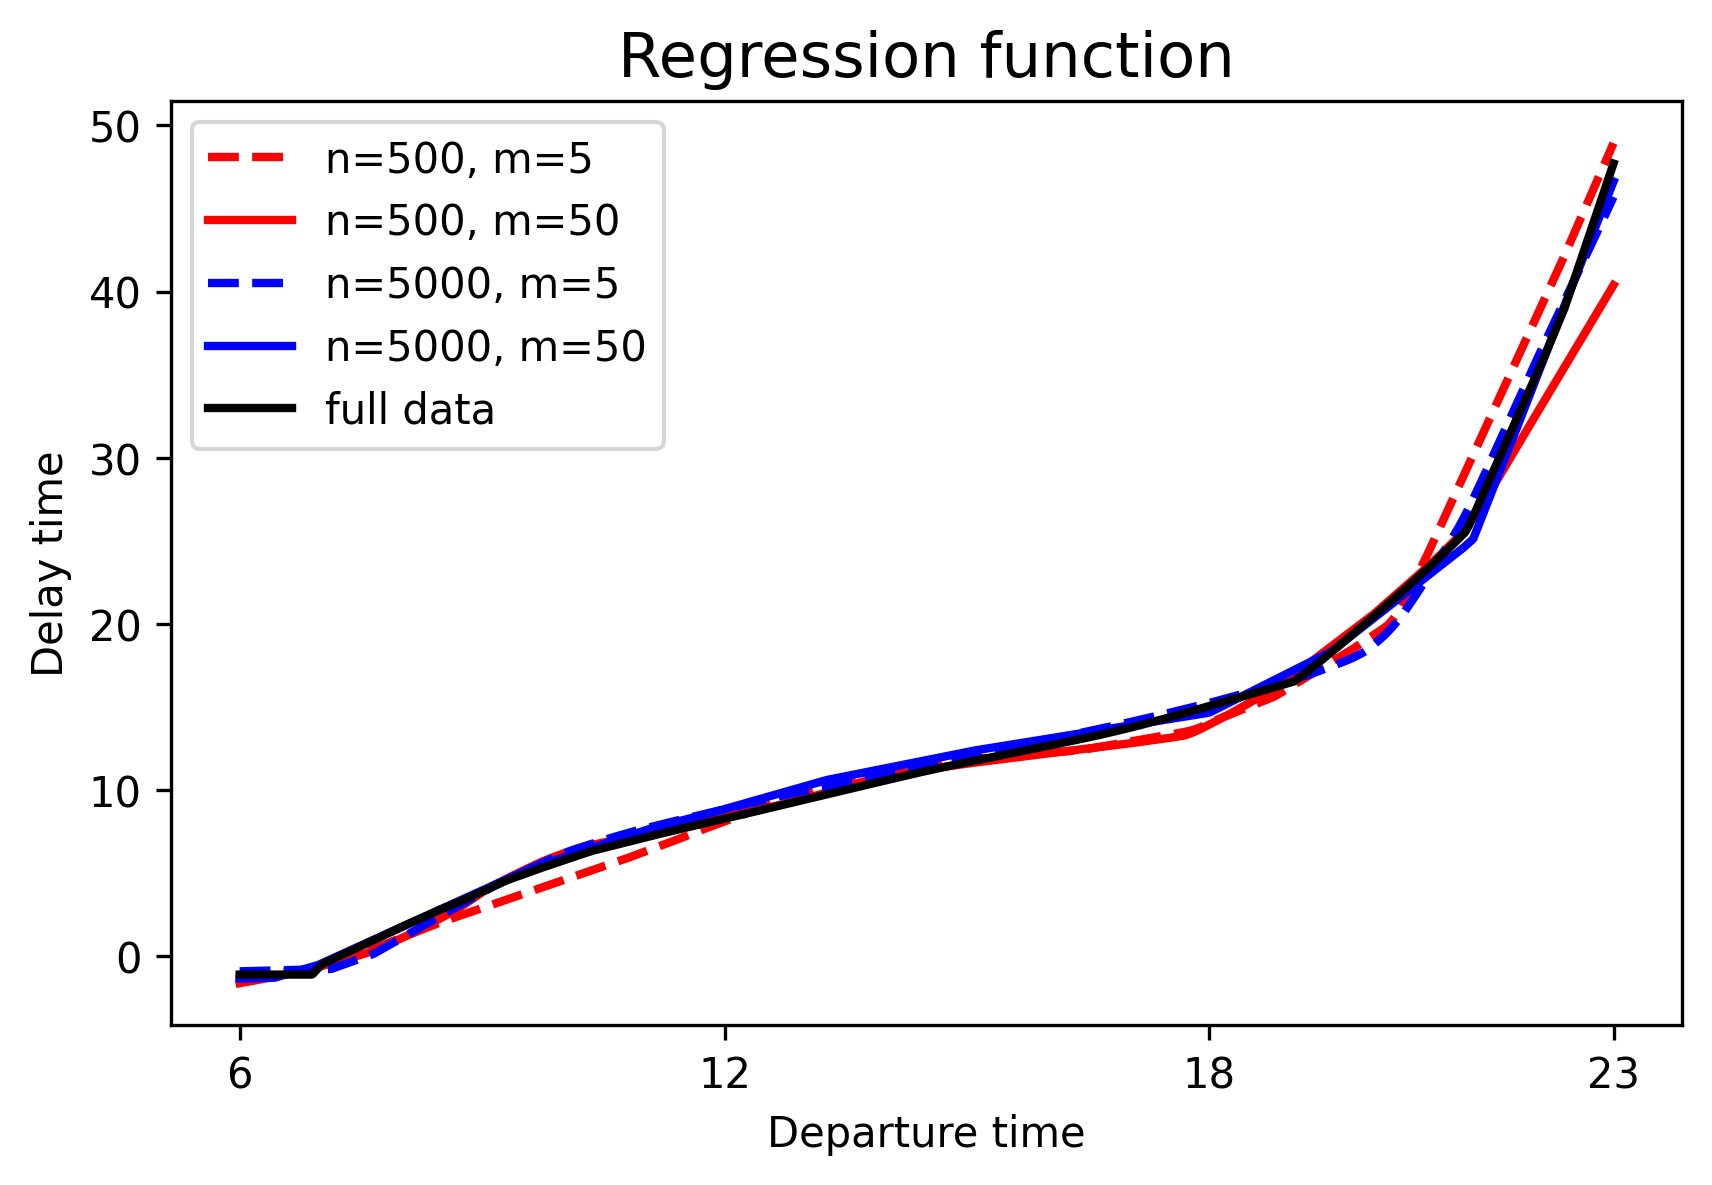

In [ ]:
## Plot regression function with different n,m.
x = np.linspace(0,1,1000)
xr = x * (23- 6) + 6 
x = torch.from_numpy(x).float().view(-1,1,1).cuda()
lw = 2
path = "./bestnet/best"
nnn = 500
m = 5
net = torch.load(path + str(nnn) +"m"+ str(m) +'net.pth').cuda()
y = net(x)
y = y.cpu().detach().numpy().reshape(-1)
yr = y * 310 - 10 
plt.figure(num=3,figsize=(6.5,4), dpi=300)
a1, = plt.plot(xr,yr,color='red',linewidth=lw,linestyle='--')

nnn = 500
m = 50
net = torch.load(path + str(nnn) +"m"+ str(m) +'net.pth').cuda()
y = net(x)
y = y.cpu().detach().numpy().reshape(-1)
yr = y * 310 - 10 
plt.figure(num=3,figsize=(6.5,4), dpi=300)
a2, = plt.plot(xr,yr,color='red',linewidth=lw,linestyle='-')


nnn = 5000
m = 5
net = torch.load(path + str(nnn) +"m"+ str(m) +'net.pth').cuda()
y = net(x)
y = y.cpu().detach().numpy().reshape(-1)
yr = y * 310 - 10 
plt.figure(num=3,figsize=(6.5,4), dpi=300)
a3, = plt.plot(xr,yr,color='blue',linewidth=lw,linestyle='--')

nnn = 5000
m = 50
net = torch.load(path + str(nnn) +"m"+ str(m) +'net.pth').cuda()
y = net(x)
y = y.cpu().detach().numpy().reshape(-1)
yr = y * 310 - 10 
plt.figure(num=3,figsize=(6.5,4), dpi=300)
a4, = plt.plot(xr,yr,color='blue',linewidth=lw,linestyle='-')


net = torch.load("./bestnet/bestfullnet.pth").cuda()
y = net(x)
y = y.cpu().detach().numpy().reshape(-1)
yr = y * 310 - 10 
plt.figure(num=3,figsize=(6.5,4), dpi=300)
a5, = plt.plot(xr,yr,color='black',linewidth=lw,linestyle='-')
plt.legend(handles = [a1,a2,a3,a4,a5],labels = ["n=500, m=5","n=500, m=50","n=5000, m=5","n=5000, m=50","full data"])
plt.xticks([6,12,18,23],[6,12,18,23])
plt.title("Regression function",size = 15)
plt.xlabel("Departure time")
plt.ylabel("Delay time")
plt.show()

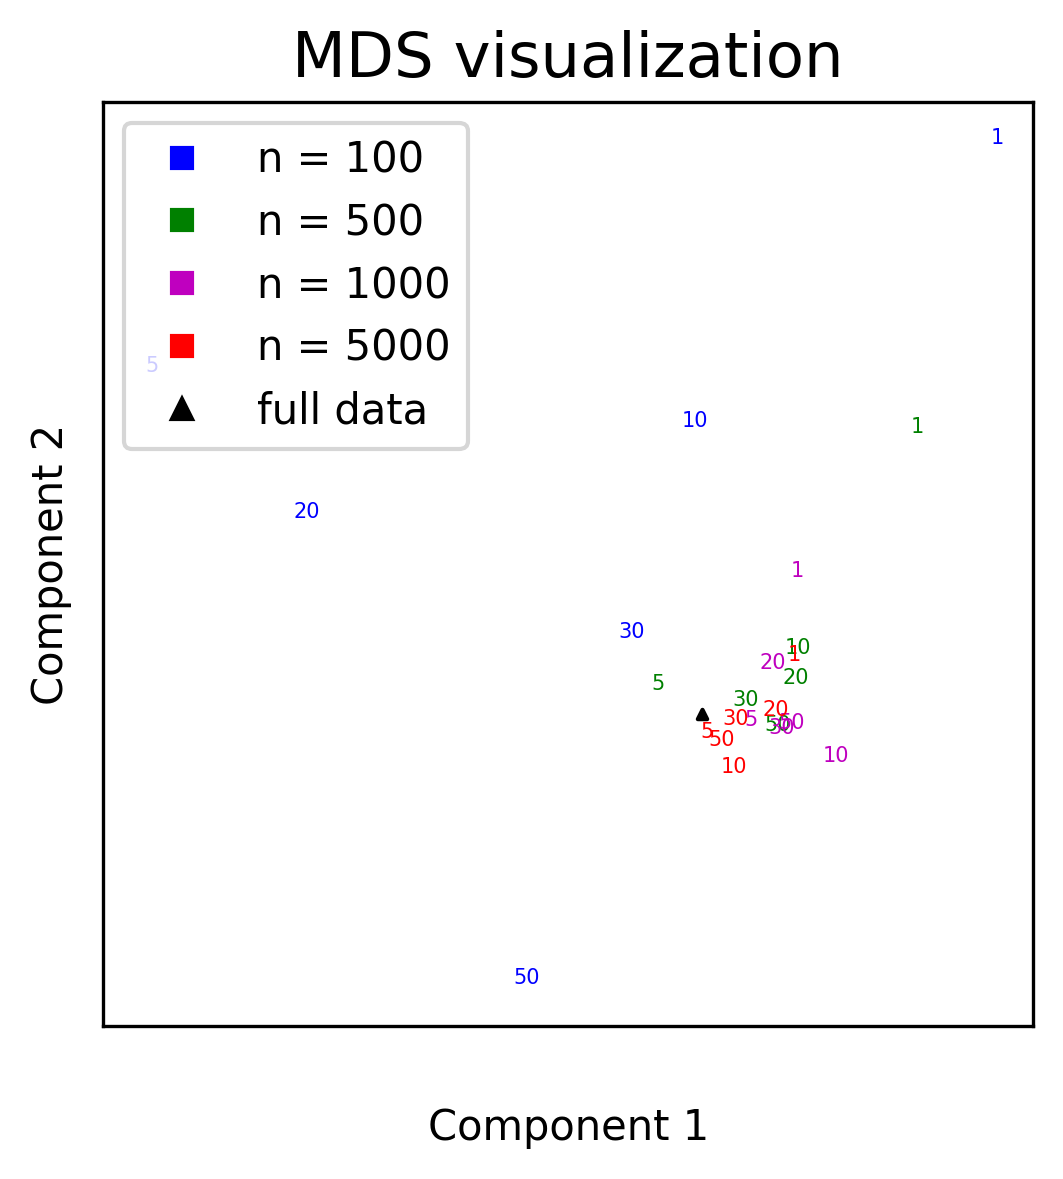

In [ ]:
from matplotlib.lines import Line2D

def plotmds0(n_vector,m_vector): 
    """
    Generate an MDS plot for visualization. 
    
    Parameters:
    n_vector: Sample size n.
    m_vector: Sampling frequency m.
    """
    ind_matrix = [[n_vector[i], m_vector[j]] for j in range(len(m_vector)) for i in range(len(n_vector))]
    torch.manual_seed(123) 
    torch.cuda.manual_seed_all(123) 
    x_test = torch.rand(1000,1,1).cuda()
    res = torch.zeros([len(n_vector) * len(m_vector) + 1, 1000]).cuda()
    dis = torch.zeros([len(n_vector) * len(m_vector) + 1, len(n_vector) * len(m_vector) + 1])
    for i in range(len(n_vector) * len(m_vector)):
        m = ind_matrix[i][1]
        nnn = ind_matrix[i][0]
        net = torch.load("./bestnet/best" + str(nnn) +"m"+ str(m) +'net.pth').cuda()
        test_predict=net(x_test)
        test_y_pre=test_predict.view(-1).detach()
        test_y_pre=torch.Tensor(test_y_pre).float()
        res[i,]=test_y_pre
    net = torch.load("./bestnet/bestfullnet.pth").cuda()
    test_predict=net(x_test)
    test_y_pre=test_predict.view(-1).detach()
    test_y_pre=torch.Tensor(test_y_pre).float()
    res[len(n_vector)*len(m_vector),]=test_y_pre
        
    loss_function=nn.MSELoss()
    for i in range(len(n_vector) * len(m_vector)+1):
        for j in range(len(n_vector) * len(m_vector)+1):
            dis[i,j] = loss_function(res[i,],res[j,])
            dis[j,i] = dis[i,j]
    dist = dis.detach().cpu().numpy()

    ke=mds1(dist)
    
    fig,ax=plt.subplots(dpi=300,figsize=(4,4))
    ax.scatter(ke[:,0],ke[:,1],c='w')

    col_indexes = ["b","g","m","r"]

    for i in range(len(n_vector)):
        for j in range(len(m_vector)):
            indd = j * len(n_vector) + i
            ax.annotate(m_vector[j],(ke[indd,0],ke[indd,1]), color = col_indexes[i],size = 5)#, cmap='rainbow')
    ax.scatter(ke[(len(n_vector) * len(m_vector)),0],ke[(len(n_vector) * len(m_vector)),1],marker = "^", color = "black",s=5)

    legend_elements = [Line2D([0], [0],linestyle="None", marker='s',  label= "n = " + str(n_vector[i]), color = col_indexes[i], 
                          markersize=5)  for i in range(len(n_vector))]

    legend_elements2 = [Line2D([0], [0],linestyle="None", marker='^',  label= "full data", color = "black", markersize=5)]
    legend_elements = legend_elements + legend_elements2
    plt.title("MDS visualization",size = 15)
    plt.xlabel("Component 1",labelpad=16)
    plt.ylabel("Component 2")
    plt.xticks([])
    plt.yticks([])
    ax.legend(handles=legend_elements,loc = "upper left")

n_vector = [100,500,1000,5000] 
m_vector = [1,5,10,20,30,50] 
plotmds0(n_vector,m_vector)